In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\breast-cancer.csv")
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

# DATA CLEANİNG

In [3]:
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.shape

(569, 32)

In [7]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

In [10]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unikal dəyərlər {column} sütununda:")
    print(unique_values)
    print("\n")

Unikal dəyərlər id sütununda:
[   842302    842517  84300903  84348301  84358402    843786    844359
  84458202    844981  84501001    845636  84610002    846226    846381
  84667401  84799002    848406  84862001    849014   8510426   8510653
   8510824   8511133    851509    852552    852631    852763    852781
    852973    853201    853401    853612  85382601    854002    854039
    854253    854268    854941    855133    855138    855167    855563
    855625    856106  85638502    857010  85713702     85715    857155
    857156    857343    857373    857374    857392    857438  85759902
    857637    857793    857810    858477    858970    858981    858986
    859196  85922302    859283    859464    859465    859471    859487
    859575    859711    859717    859983   8610175   8610404   8610629
   8610637   8610862   8610908    861103   8611161   8611555   8611792
   8612080   8612399  86135501  86135502    861597    861598    861648
    861799    861853    862009    862028     86

In [12]:
for i in df.select_dtypes(exclude="object"):
    fig=px.box(df, y=i)
    fig.show()

In [13]:
def outliers(melumat):    
    for col in melumat.columns:
        if melumat[col].dtype=="int64" or df[col].dtype=="float64":         
            q1=melumat[col].quantile(0.25)
            q3=melumat[col].quantile(0.75)            
            IQR=q3-q1
            lower_limit=q1-IQR*1.5
            upper_limit=q3+IQR*1.5            
            melumat[col]=np.where(melumat[col]>=upper_limit,upper_limit,np.where(melumat[col]<=lower_limit,lower_limit,melumat[col]))

In [14]:
outliers(df)

In [15]:
for i in df.select_dtypes(exclude="object"):
    fig=px.box(df, y=i)
    fig.show()

In [16]:
df.drop(columns = "id",axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# DATA VİSUALİZATİON

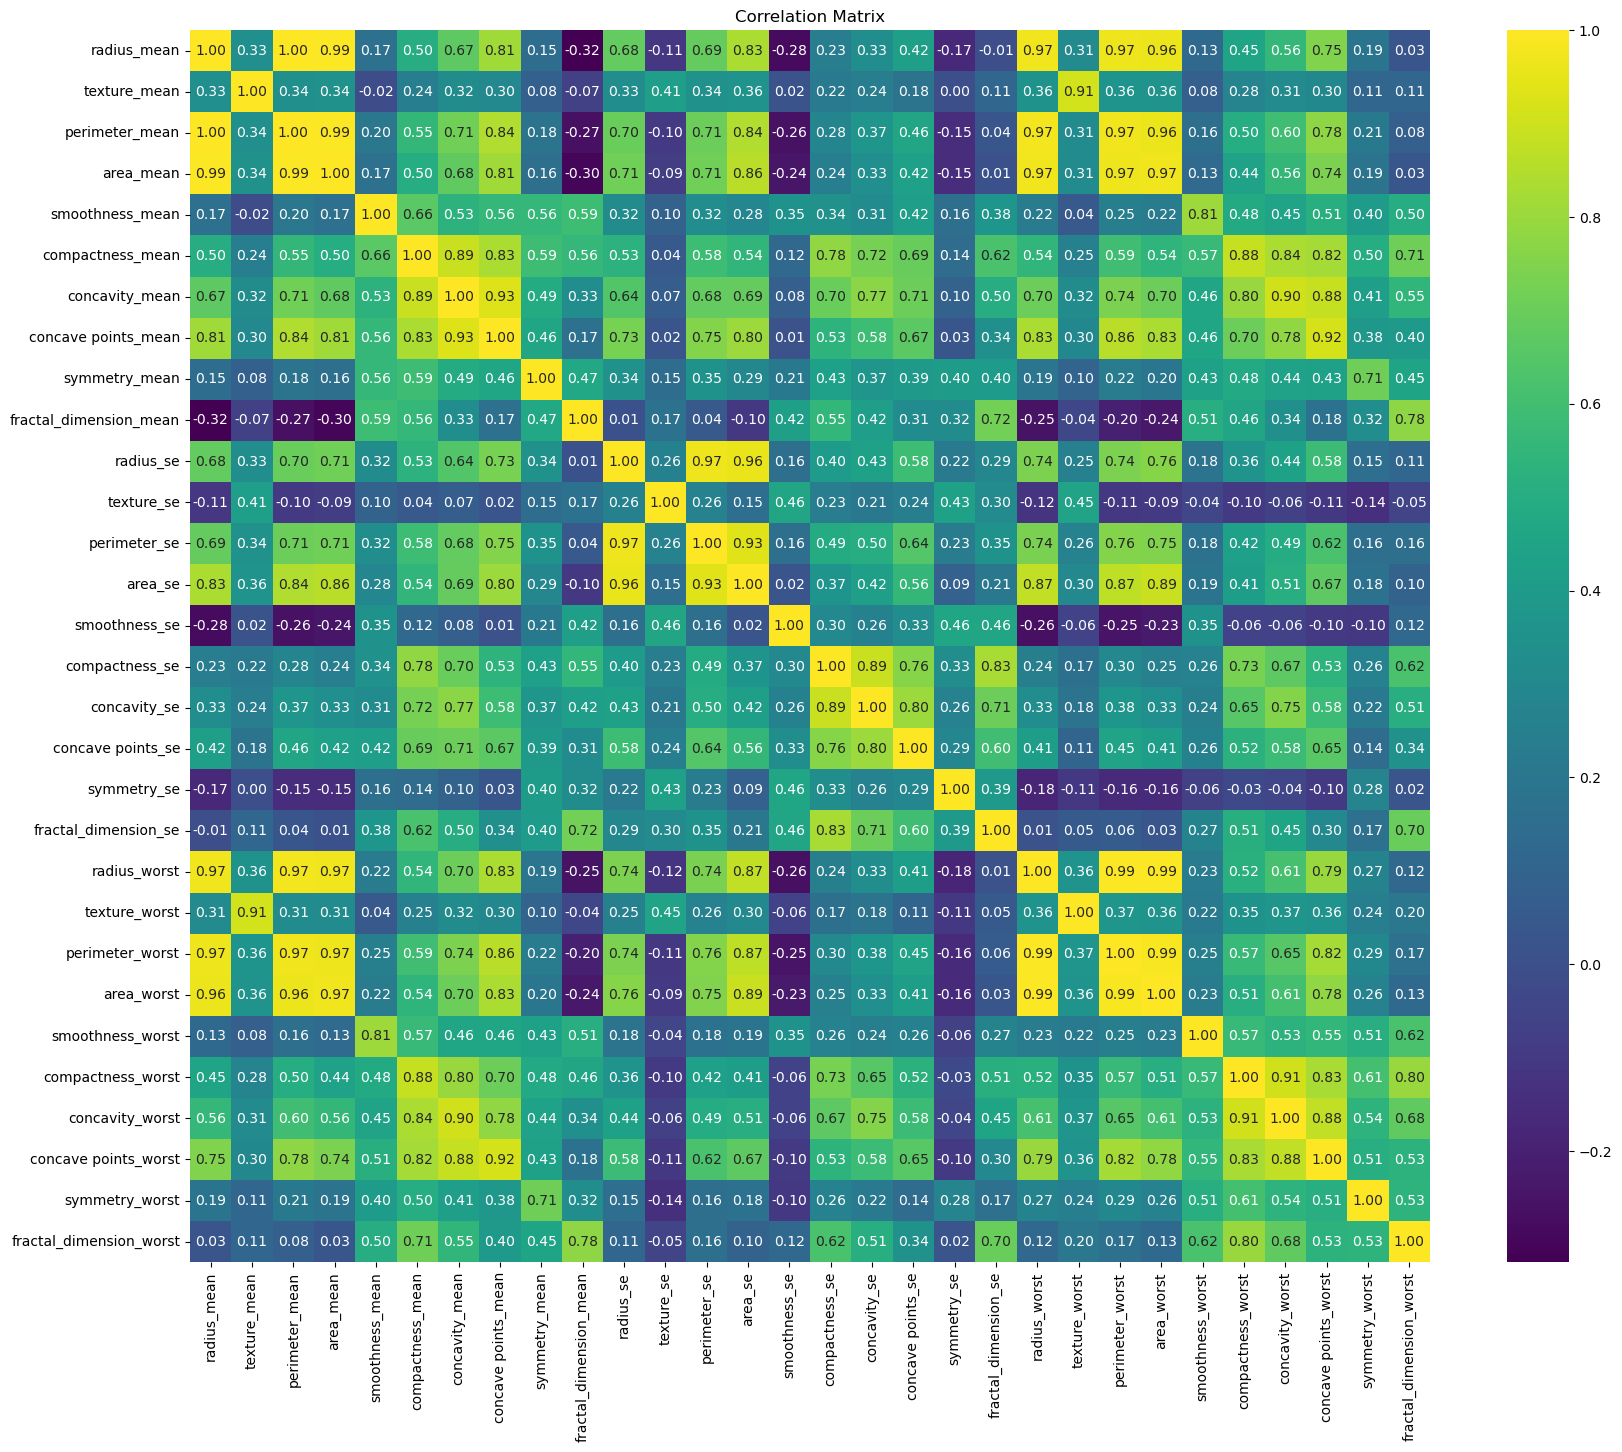

In [18]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

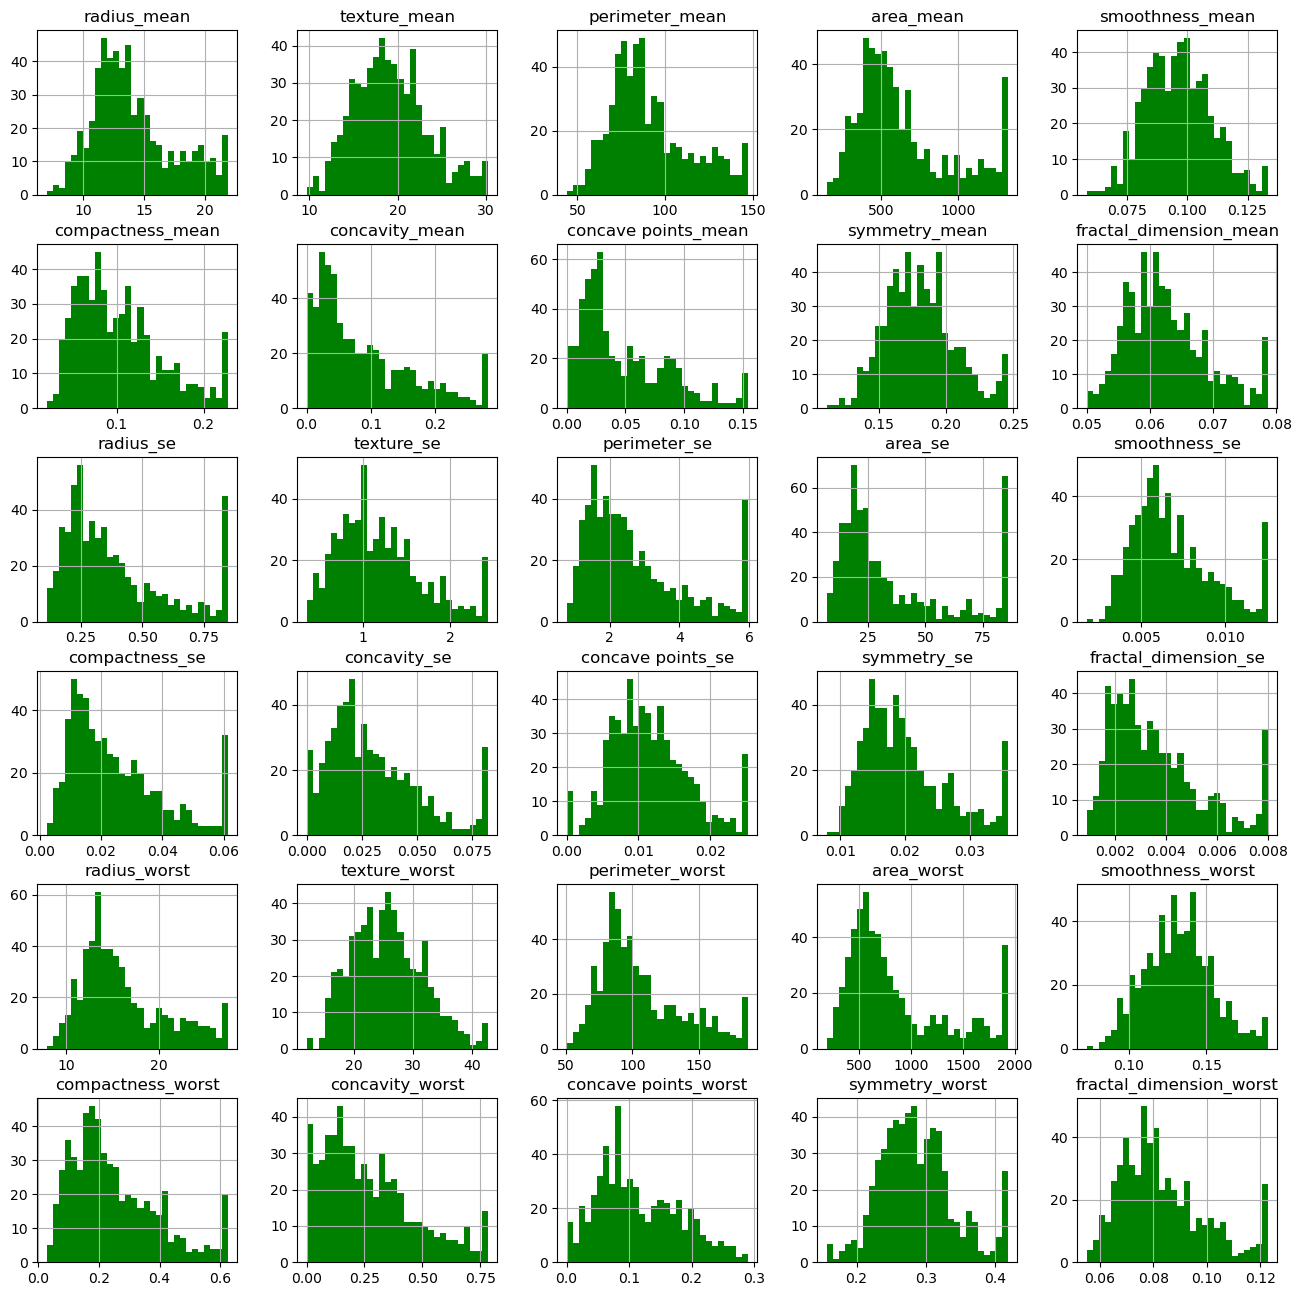

In [19]:
df.hist(bins=30, color="green", figsize=(16,16))

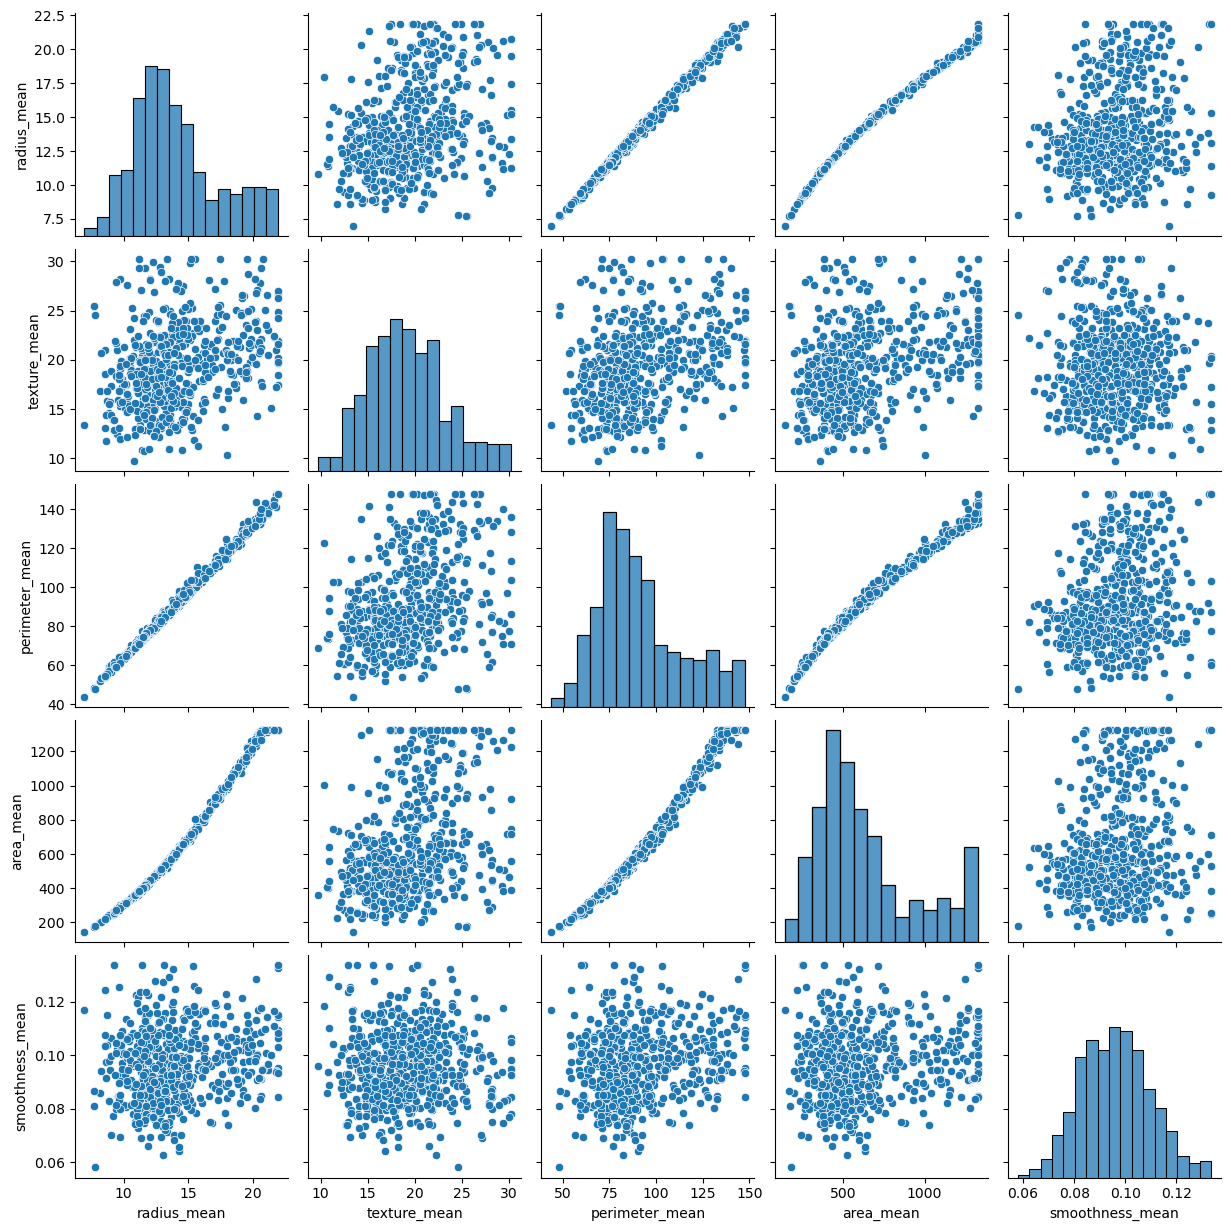

In [20]:
sns.pairplot(df[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean"]])
plt.show()

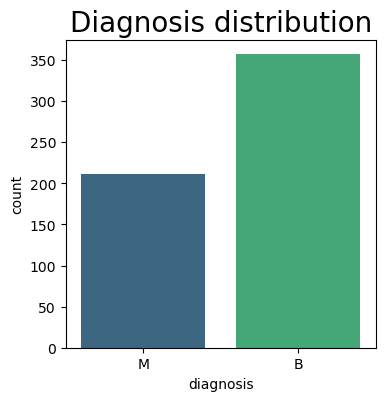

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(x="diagnosis", data=df, color="diagnosis", palette="viridis")
plt.title("Diagnosis distribution", fontsize=20)
plt.show()

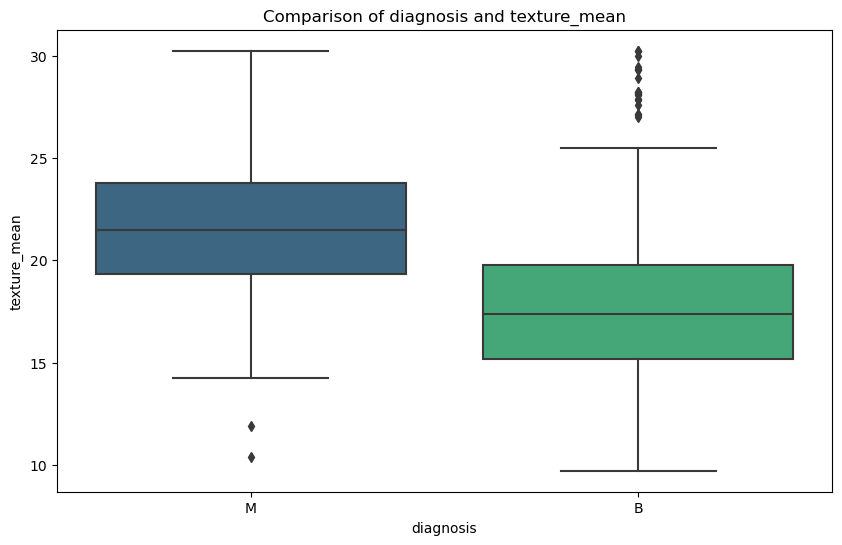

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="diagnosis", y="texture_mean", data=df, palette="viridis")
plt.xlabel("diagnosis")
plt.ylabel("texture_mean")
plt.title("Comparison of diagnosis and texture_mean")
plt.show()

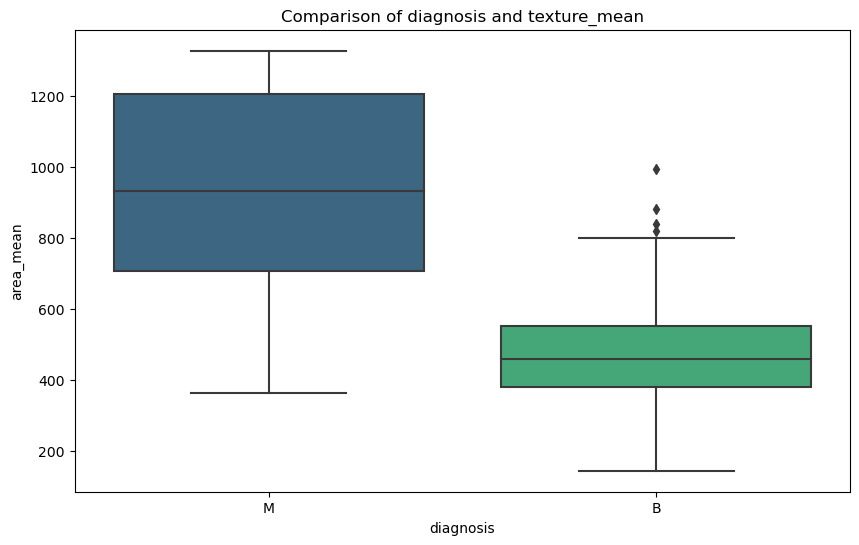

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="diagnosis", y="area_mean", data=df, palette="viridis")
plt.xlabel("diagnosis")
plt.ylabel("area_mean")
plt.title("Comparison of diagnosis and texture_mean")
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# ENCODİNG

In [25]:
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])

In [26]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1326.3   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.118400           0.22862         0.28241              0.14710   
1           0.084740           0.07864         0.08690              0.07017   
2           0.109600           0.15990         0.19740              0.12790   
3           0.133695           0.22862         0.24140              0.10520   
4           0.100300           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564         0.111000           0.11590         0.24390              0.13890   
565         0.097800           0.10340         0.14400              0.09791   
566         0.084550           0.10230         0.09251              0.05302   
567         0.117800           0.22862         0.28241              0.15200   
568         0.057975           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2464  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       1937.05           0.16220            0.62695           0.7119   
1       1937.05           0.12380            0.18660           0.2416   
2       1709.00           0.14440            0.42450           0.4504   
3        567.70           0.19010            0.62695           0.6869   
4       1575.00           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564     1937.05           0.14100            0.21130           0.4107   
565     1731.00           0.11660            0.19220           0.3215   
566     1124.00           0.11390            0.30940           0.3403   
567     1821.00           0.16500            0.62695           0.7855   
568      268.60           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654         0.41915                  0.11890  
1                  0.1860         0.27500                  0.08902  
2                  0.2430         0.36130                  0.08758  
3                  0.2575         0.41915                  0.12301  
4                  0.1625         0.23640                  0.07678  
..                    .

# SPLİTİNG

In [27]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
68            0.14130         0.28241              0.04375         0.2111   
181           0.22862         0.24870              0.14960         0.2395   
63            0.08751         0.05988              0.02180         0.2341   
248           0.07234         0.02379              0.01615         0.1897   
60            0.08061         0.01084              0.01290         0.2464   
..                ...             ...                  ...            ...   
71            0.15310         0.08606              0.02872         0.1902   
106           0.10170         0.07070              0.03485         0.1801   
270           0.02675         0.00725              0.00625         0.1508   
435           0.11330         0.11260              0.06463         0.1669   
102           0.04038         0.02383              0.01770         0.1739   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
68                  0.07875  ...        10.310          22.65   
181                 0.07398  ...        26.680          33.48   
63                  0.06963  ...        10.010          19.23   
248                 0.06329  ...        12.250          35.19   
60                  0.06960  ...        11.020          17.45   
..                      ...  ...           ...            ...   
71                  0.07875  ...         9.733          15.67   
106                 0.06520  ...        13.140          29.26   
270                 0.05376  ...        14.910          20.65   
435                 0.06544  ...        17.040          30.80   
102                 0.05677  ...        13.340          32.84   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
68             65.50      324.70           0.14820            0.43650   
181           176.50     1937.05           0.14910            0.62695   
63             65.59      310.10           0.09836            0.16780   
248            77.98      455.70           0.14990            0.13980   
60             69.86      368.60           0.12750            0.09866   
..               ...         ...               ...                ...   
71             62.56      284.40           0.12070            0.24360   
106            85.51      521.70           0.16880            0.26600   
270            94.44      684.60           0.08567            0.05036   
435           113.90      869.30           0.16130            0.35680   
102            84.58      547.80           0.11230            0.08862   

     concavity_worst  concave points_worst  symmetry_worst  \
68           0.78550               0.17500         0.41915   
181          0.67800               0.29030         0.40980   
63           0.13970               0.05087         0.32820   
248          0.11250               0.06136         0.34090   
60           0.02168               0.02579         0.35570   
..               ...                   ...             ...   
71           0.14340               0.04786         

In [29]:
X_test

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
204        12.47        18.600           81.09      481.9          0.09965   
70         18.94        21.310          123.60     1130.0          0.09009   
131        15.46        19.480          101.70      748.9          0.10920   
431        12.40        17.680           81.47      467.8          0.10540   
540        11.54        14.440           74.65      402.9          0.09984   
..           ...           ...             ...        ...              ...   
486        14.64        16.850           94.21      666.0          0.08641   
75         16.07        19.650          104.10      817.7          0.09168   
249        11.52        14.930           73.87      406.3          0.10130   
238        14.22        27.850           92.55      623.9          0.08223   
265        20.73        30.245          135.70     1326.3          0.09469   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
204           0.10580         0.08005              0.03821         0.1925   
70            0.10290         0.10800              0.07951         0.1582   
131           0.12230         0.14660              0.08087         0.1931   
431           0.13160         0.07741              0.02799         0.1811   
540           0.11200         0.06737              0.02594         0.1818   
..                ...             ...                  ...            ...   
486           0.06698         0.05192              0.02791         0.1409   
75            0.08424         0.09769              0.06638         0.1798   
249           0.07808         0.04328              0.02929         0.1883   
238           0.10390         0.11030              0.04408         0.1342   
265           0.11430         0.13670              0.08646         0.1769   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
204                 0.06373  ...         14.97          24.64   
70                  0.05461  ...         24.86          26.58   
131                 0.05796  ...         19.26          26.00   
431                 0.07102  ...         12.88          22.91   
540                 0.06782  ...         12.26          19.68   
..                      ...  ...           ...            ...   
486                 0.05355  ...         16.46          25.44   
75                  0.05391  ...         19.77          24.56   
249                 0.06168  ...         12.65          21.19   
238                 0.06129  ...         15.75          40.54   
265                 0.05674  ...         27.46          42.68   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
204           96.050      677.90            0.1426             0.2378   
70           165.900     1866.00            0.1193             0.2336   
131          124.900     1156.00            0.1546             0.2394   
431           89.610      515.80            0.1450             0.2629   
540           78.780      457.80            0.1345             0.2118   
..               ...         ...               ...                ...   
486          106.000      831.00            0.1142             0.2070   
75           128.800     1223.00            0.1500             0.2045   
249           80.880      491.80            0.1389             0.1582   
238          102.500      764.00            0.1081             0.2426   
265          187.335     1937.05            0.1401             0.2644   

     concavity_worst  concave points_worst  symmetry_worst  \
204           0.2671               0.10150          0.3014   
70            0.2687               0.17890          0.2551   
131           0.3791               0.15140          0.2837   
431           0.2403               0.07370          0.2556   
540           0.1797               0.06918          0.2329   
..               ...                   ...             ...   
486           0.2437               0.07828         

In [30]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


# SCAİLİNG

In [31]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train = pd.DataFrame(X_train)
X_train.columns = df.drop("diagnosis", axis=1).columns

In [33]:
X_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -1.507479     -0.439910       -1.424482  -1.273885         0.815750   
1       2.115614      1.801734        2.239408   2.207056         1.373644   
2      -1.464222     -1.281739       -1.406580  -1.239748        -1.370450   
3      -1.020535      1.474222       -1.021895  -0.957137         0.069660   
4      -1.164726     -1.034285       -1.172974  -1.072348         1.321574   
..           ...           ...             ...        ...              ...   
450    -1.549835     -1.092510       -1.424482  -1.295220         0.163386   
451    -0.723142     -0.197308       -0.709257  -0.742143         1.381083   
452     0.072911     -0.563637       -0.048613  -0.019696        -2.331515   
453    -0.020212      0.115649       -0.012808  -0.128342         0.771119   
454    -0.560927      0.333991       -0.619745  -0.590498        -1.153243   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.777715        2.657825            -0.112928       1.162990   
1            2.536587        2.199237             2.765009       2.248251   
2           -0.305767       -0.369456            -0.709723       2.041899   
3           -0.611334       -0.860421            -0.863340       0.345223   
4           -0.444753       -1.036592            -0.951704       2.511924   
..                ...             ...                  ...            ...   
450          1.015401       -0.013305            -0.521576       0.364329   
451         -0.019941       -0.222261            -0.354909      -0.021626   
452         -1.529645       -1.085430            -1.132509      -1.141280   
453          0.213716        0.347743             0.454774      -0.526044   
454         -1.255098       -0.859877            -0.821197      -0.258550   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  2.517303  ...     -1.279846      -0.478742   
1                  1.777061  ...      2.305938       1.334395   
2                  1.101998  ...     -1.345560      -1.051311   
3                  0.118113  ...     -0.854897       1.620680   
4                  1.097342  ...     -1.124324      -1.349315   
..                      ...  ...           ...            ...   
450                2.517303  ...     -1.406236      -1.647319   
451                0.414520  ...     -0.659946       0.627891   
452               -1.360819  ...     -0.272234      -0.813578   
453                0.451765  ...      0.194334       0.885715   
454               -0.893706  ...     -0.616137       1.227248   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0          -1.292798   -1.103742          0.741455           1.312983   
1           2.199540    2.307098          0.781186           2.646524   
2          -1.289966   -1.134628         -1.458784          -0.568470   
3          -0.900146   -0.826619          0.816503          -0.764527   
4          -1.155622   -1.010874         -0.172368          -1.052592   
..               ...         ...               ...                ...   
450        -1.385298   -1.188995         -0.472562          -0.037714   
451        -0.663233   -0.686999          1.650863           0.119132   
452        -0.382273   -0.342393         -2.018998          -1.390791   
453         0.229987    0.048330          1.319768           0.754919   
454        -0.692494   -0.631786         -0.843388          -1.122892   

     concavity_worst  concave points_worst  symmetry_worst  \
0           2.588516              0.932012        2.415749   
1           2.047315              2.698947        2.243797   
2          -0.662722             -0.970239        0.743125   
3          -0.799659             -0.809483        0.976686   
4          -1.256887             -1.354582        1.248866   
..               ...                   ...             ...   
450        -0.644095             -1.016366       -1

In [34]:
X_test

array([[-0.47381183, -0.13180497, -0.45076324, ..., -0.19435087,
         0.25025752,  0.25719297],
       [ 1.4697592 ,  0.52564696,  1.40541552, ...,  0.99177862,
        -0.60122674, -1.07559018],
       [ 0.42437633,  0.08168496,  0.44916253, ...,  0.57035018,
        -0.07525591, -0.19364668],
       ...,
       [-0.75918934, -1.022155  , -0.76602108, ..., -0.27741059,
        -0.39341309, -0.32316286],
       [ 0.05188358,  2.11226526,  0.04963216, ..., -0.49027026,
        -1.81684466, -0.33118053],
       [ 2.00747051,  2.6932975 ,  1.93375622, ...,  0.7925579 ,
        -0.01824508, -0.07091468]])

# MODELS

# Decision Tree

In [35]:
# Decision Tree modelinin yaradılması və təlim edilməsi
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Təlim dəstəsi üzərində proqnozlar
y_pred_dt_train = dt.predict(X_train)

# Test dəstəsi üzərində proqnozlar
y_pred_dt_test = dt.predict(X_test)

# Təlim dəstəsi üçün performans metriklərinin hesablanması
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
precision_dt_train = precision_score(y_train, y_pred_dt_train)
recall_dt_train = recall_score(y_train, y_pred_dt_train)
f1_dt_train = f1_score(y_train, y_pred_dt_train, average="macro")
roc_auc_dt_train = roc_auc_score(y_train, y_pred_dt_train)

# Test dəstəsi üçün performans metriklərinin hesablanması
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
precision_dt_test = precision_score(y_test, y_pred_dt_test)
recall_dt_test = recall_score(y_test, y_pred_dt_test)
f1_dt_test = f1_score(y_test, y_pred_dt_test, average="macro")
roc_auc_dt_test = roc_auc_score(y_test, y_pred_dt_test)

# Nəticələrin çap edilməsi
print("Train Metrics:")
print(f"Decision Tree Train Accuracy: {accuracy_dt_train:.2f}")
print(f"Decision Tree Train Precision: {precision_dt_train:.2f}")
print(f"Decision Tree Train Recall: {recall_dt_train:.2f}")
print(f"Decision Tree Train F1 Score (macro): {f1_dt_train:.2f}")
print(f"Decision Tree Train ROC-AUC: {roc_auc_dt_train:.2f}")

print("\nTest Metrics:")
print(f"Decision Tree Test Accuracy: {accuracy_dt_test:.2f}")
print(f"Decision Tree Test Precision: {precision_dt_test:.2f}")
print(f"Decision Tree Test Recall: {recall_dt_test:.2f}")
print(f"Decision Tree Test F1 Score (macro): {f1_dt_test:.2f}")
print(f"Decision Tree Test ROC-AUC: {roc_auc_dt_test:.2f}")

Train Metrics:
Decision Tree Train Accuracy: 1.00
Decision Tree Train Precision: 1.00
Decision Tree Train Recall: 1.00
Decision Tree Train F1 Score (macro): 1.00
Decision Tree Train ROC-AUC: 1.00

Test Metrics:
Decision Tree Test Accuracy: 0.94
Decision Tree Test Precision: 0.91
Decision Tree Test Recall: 0.93
Decision Tree Test F1 Score (macro): 0.93
Decision Tree Test ROC-AUC: 0.94


# Logistic Regression 

In [36]:
# Logistic Regression modelinin yaradılması və təlim edilməsi
log_r = LogisticRegression()
log_r.fit(X_train, y_train)

# Təlim dəstəsi üzərində proqnozlar
y_pred_log_r_train = log_r.predict(X_train)

# Test dəstəsi üzərində proqnozlar
y_pred_log_r_test = log_r.predict(X_test)

# Təlim dəstəsi üçün performans metriklərinin hesablanması
accuracy_log_r_train = accuracy_score(y_train, y_pred_log_r_train)
precision_log_r_train = precision_score(y_train, y_pred_log_r_train)
recall_log_r_train = recall_score(y_train, y_pred_log_r_train)
f1_log_r_train = f1_score(y_train, y_pred_log_r_train, average="macro")
roc_auc_log_r_train = roc_auc_score(y_train, y_pred_log_r_train)

# Test dəstəsi üçün performans metriklərinin hesablanması
accuracy_log_r_test = accuracy_score(y_test, y_pred_log_r_test)
precision_log_r_test = precision_score(y_test, y_pred_log_r_test)
recall_log_r_test = recall_score(y_test, y_pred_log_r_test)
f1_log_r_test = f1_score(y_test, y_pred_log_r_test, average="macro")
roc_auc_log_r_test = roc_auc_score(y_test, y_pred_log_r_test)

# Nəticələrin çap edilməsi
print("Train Metrics:")
print(f"Logistic Regression Train Accuracy: {accuracy_log_r_train:.2f}")
print(f"Logistic Regression Train Precision: {precision_log_r_train:.2f}")
print(f"Logistic Regression Train Recall: {recall_log_r_train:.2f}")
print(f"Logistic Regression Train F1 Score (macro): {f1_log_r_train:.2f}")
print(f"Logistic Regression Train ROC-AUC: {roc_auc_log_r_train:.2f}")

print("\nTest Metrics:")
print(f"Logistic Regression Test Accuracy: {accuracy_log_r_test:.2f}")
print(f"Logistic Regression Test Precision: {precision_log_r_test:.2f}")
print(f"Logistic Regression Test Recall: {recall_log_r_test:.2f}")
print(f"Logistic Regression Test F1 Score (macro): {f1_log_r_test:.2f}")
print(f"Logistic Regression Test ROC-AUC: {roc_auc_log_r_test:.2f}")

Train Metrics:
Logistic Regression Train Accuracy: 0.99
Logistic Regression Train Precision: 0.99
Logistic Regression Train Recall: 0.97
Logistic Regression Train F1 Score (macro): 0.99
Logistic Regression Train ROC-AUC: 0.98

Test Metrics:
Logistic Regression Test Accuracy: 0.98
Logistic Regression Test Precision: 0.98
Logistic Regression Test Recall: 0.98
Logistic Regression Test F1 Score (macro): 0.98
Logistic Regression Test ROC-AUC: 0.98


# Random Forest

In [37]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf_train = rf_model.predict(X_train)

y_pred_rf_test = rf_model.predict(X_test)

accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
f1_rf_train = f1_score(y_train, y_pred_rf_train, average="macro")
roc_auc_rf_train = roc_auc_score(y_train, y_pred_rf_train)

accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test, average="macro")
roc_auc_rf_test = roc_auc_score(y_test, y_pred_rf_test)

print("Train Metrics:")
print(f"Random Forest Train Accuracy: {accuracy_rf_train:.2f}")
print(f"Random Forest Train F1 Score (macro): {f1_rf_train:.2f}")
print(f"Random Forest Train ROC-AUC: {roc_auc_rf_train:.2f}")

print("\nTest Metrics:")
print(f"Random Forest Test Accuracy: {accuracy_rf_test:.2f}")
print(f"Random Forest Test F1 Score (macro): {f1_rf_test:.2f}")
print(f"Random Forest Test ROC-AUC: {roc_auc_rf_test:.2f}")

Train Metrics:
Random Forest Train Accuracy: 1.00
Random Forest Train F1 Score (macro): 1.00
Random Forest Train ROC-AUC: 1.00

Test Metrics:
Random Forest Test Accuracy: 0.96
Random Forest Test F1 Score (macro): 0.96
Random Forest Test ROC-AUC: 0.96


# XGBoost

In [38]:
# XGB modelinin yaradılması
xgb_model = xgb.XGBClassifier(random_state=42)

# XGB modelinin təlimi
xgb_model.fit(X_train, y_train)

# Təlim üzerinde təxminlerin edilməsi
y_pred_train = xgb_model.predict(X_train)

# Test üzərində təxminlerin edilməsi
y_pred_test = xgb_model.predict(X_test)

# Təlim metriklerinin hesablanması
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average="macro")
roc_auc_train = roc_auc_score(y_train, y_pred_train)

# Test metriklerinin hesablanması
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average="macro")
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Neticelerin yazdırılması
print("Train Metrics:")
print(f"XGBoost Train Accuracy: {accuracy_train:.2f}")
print(f"XGBoost Train F1 Score (macro): {f1_train:.2f}")
print(f"XGBoost Train ROC-AUC: {roc_auc_train:.2f}")

print("\nTest Metrics:")
print(f"XGBoost Test Accuracy: {accuracy_test:.2f}")
print(f"XGBoost Test F1 Score (macro): {f1_test:.2f}")
print(f"XGBoost Test ROC-AUC: {roc_auc_test:.2f}")

Train Metrics:
XGBoost Train Accuracy: 1.00
XGBoost Train F1 Score (macro): 1.00
XGBoost Train ROC-AUC: 1.00

Test Metrics:
XGBoost Test Accuracy: 0.96
XGBoost Test F1 Score (macro): 0.95
XGBoost Test ROC-AUC: 0.95


# MODEL EVALUATİON

# Roc Auc

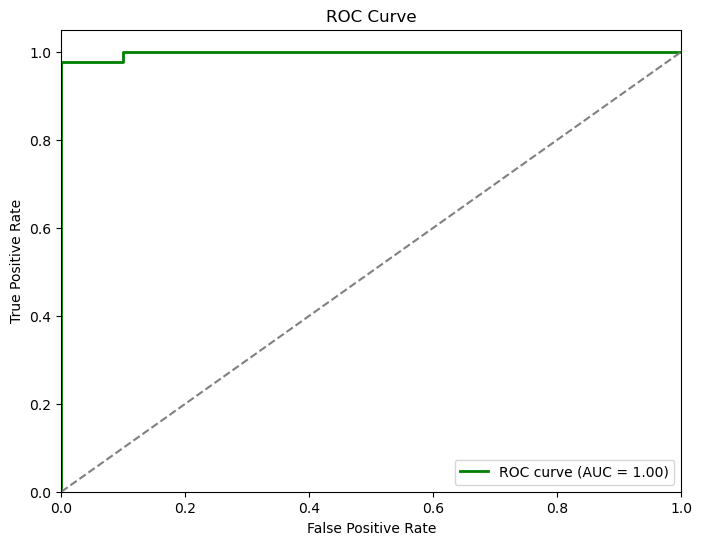

AUC Score: 1.00


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = log_r.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="green", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

# Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(y_pred_log_r_test, y_test)
cm

array([[70,  1],
       [ 1, 42]], dtype=int64)

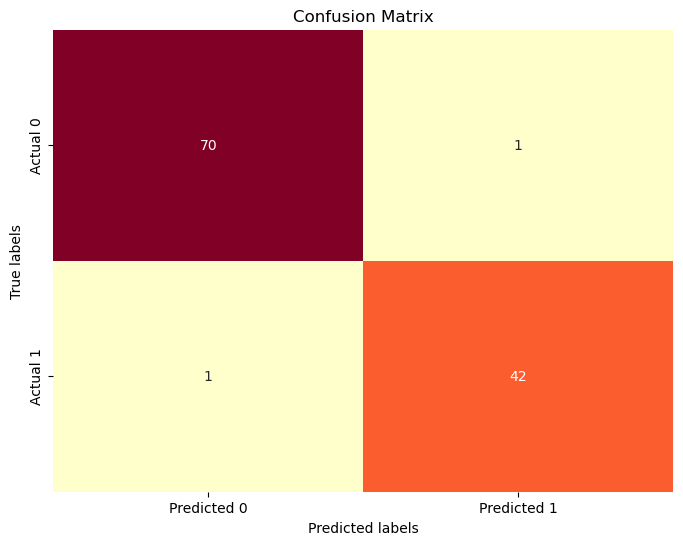

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlOrRd", fmt="d", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Shapley

In [43]:
!pip install shap
import shap

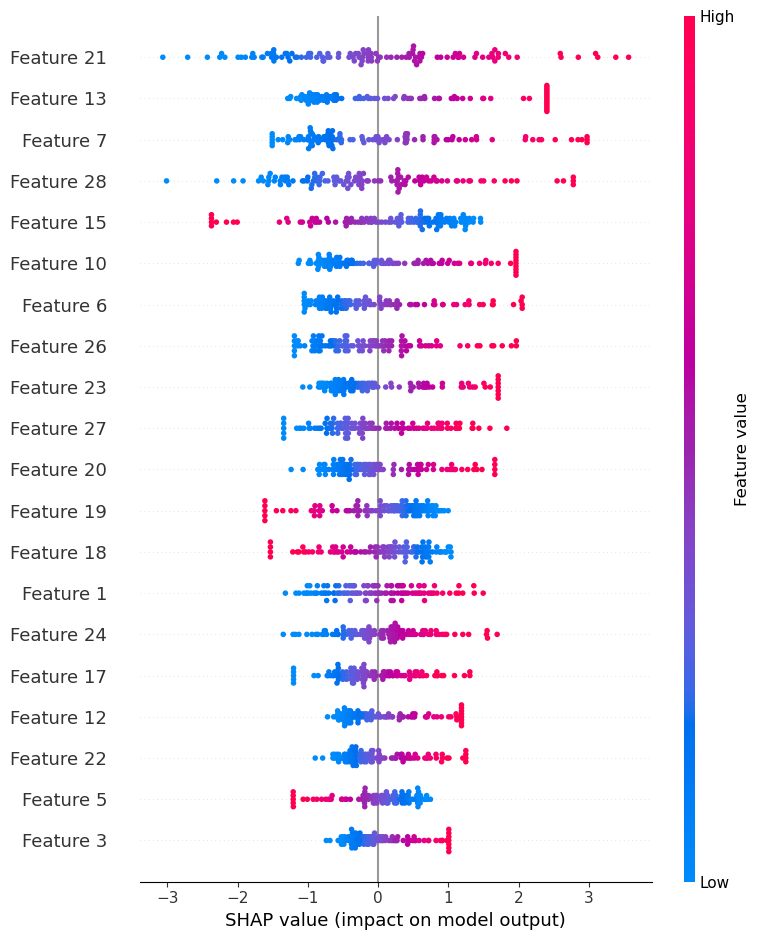

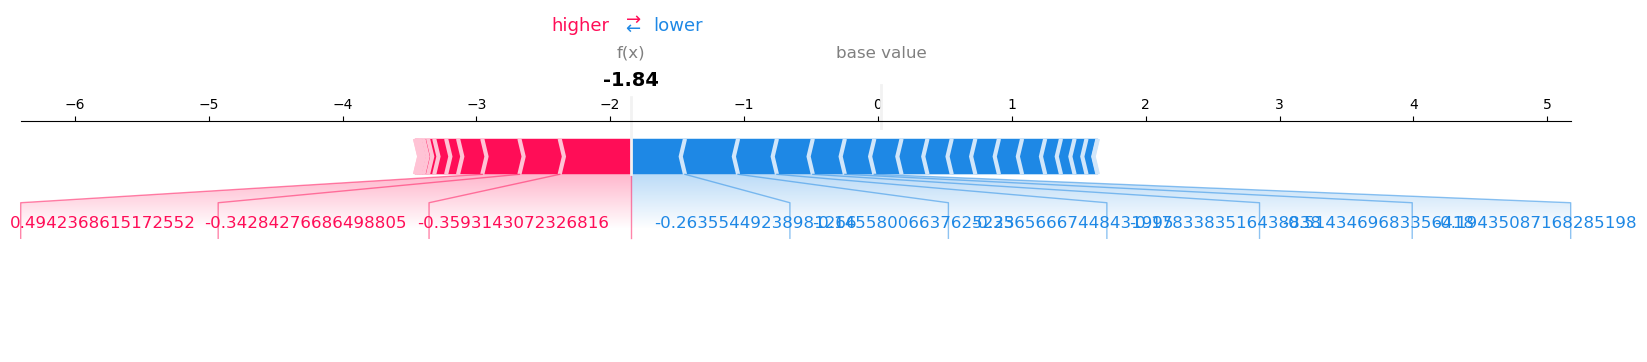

In [44]:
# SHAP Explainer objektini yaradmaq
explainer = shap.Explainer(log_r, X_train)

# SHAP dəyərlərini hesablamaq
shap_values = explainer.shap_values(X_test)

# SHAP summary plot göstərmək
shap.summary_plot(shap_values, X_test)

# Təsir nümunəsi üçün SHAP force plot göstərmək
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0, :], matplotlib=True)